# Problem definition

## Airbnb Price Prediction with Machine Learning



**Airbnb** is a marketplace for short-term rentals that allows hosts to list part or all of their living space for others to book. The platform includes everything from private rooms to entire houses. Thanks to its flexibility and competitive prices, Airbnb has become one of the main alternatives to hotels worldwide. Since its founding in 2008, the company has grown exponentially: it went public in December 2020 with a valuation of about **\$47 billion**, and as of 2025 its market capitalization exceeds **\$85 billion**, making it more valuable than most global hotel chains.



### The Pricing Challenge

One of the biggest challenges for hosts is setting the optimal nightly price. In many cities, travelers are presented with a wide variety of listings and can filter by criteria such as:

- price  
- number of bedrooms  
- property type  
- location  

Because Airbnb is a competitive marketplace, the amount a host can charge is directly tied to supply and demand dynamics.  

- If a host sets a price much higher than the local average, guests will likely choose cheaper but similar alternatives.  
- If the price is set too low, the host loses potential revenue.  




### A Simple Strategy



A straightforward approach to pricing could be:  

1. Identify similar listings.  
2. Compute the average price among them.  
3. Use that value as a reference price.  

While simple, this strategy does not fully capture the complexity of the marketplace.




### Machine Learning for Price Prediction



The process of using existing data to predict future outcomes is called machine learning. In our case, we want to use local listing data to predict the ideal nightly rate.  

In this lesson, we will explore a **regularized linear regression model** (implemented in the [mlops repository](https://github.com/ivanovitchm/mlops)).  

This model fits a mathematical function to the available data, capturing relationships between multiple features—such as number of bedrooms, location, and property type—and estimating their impact on the final price. Unlike simple averaging strategies, regression provides a more systematic way to generalize and make robust predictions across different scenarios.  




### Next Step



Before diving deeper into the model, let’s first become familiar with the dataset we’ll be working with.


# Introduction to the data


While AirBnB does not release official data on the listings available in their marketplace, an independent initiative called [Inside AirBnB](https://insideairbnb.com/rio-de-janeiro/) has extracted and published data on a sample of listings for many major cities featured on the platform.  

In this lesson, we will work with their dataset from **March 2025**, focusing on the listings from **Rio de Janeiro, Brazil**, the world-renowned capital of Samba. Here is a [direct link to the dataset](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz). Each row in this dataset corresponds to a specific property available for short-term rental on AirBnB in Rio de Janeiro.

To make the dataset easier to manage, we have removed many of the original 100+ columns. Below are the selected columns we will keep for our analysis:

- **host_response_rate**: the response rate of the host  
- **host_acceptance_rate**: percentage of requests to the host that convert into rentals  
- **host_listings_count**: number of other listings managed by the host  
- **latitude**: latitude of the property’s geographic coordinates  
- **longitude**: longitude of the property’s geographic coordinates  
- **city**: the city where the property is located  
- **zipcode**: the postal code of the property  
- **state**: the state where the property is located  
- **accommodates**: the number of guests the property can host  
- **room_type**: the type of accommodation (Private room, Shared room, or Entire home/apt)  
- **bedrooms**: number of bedrooms included in the rental  
- **bathrooms**: number of bathrooms available  
- **beds**: number of beds included  
- **price**: nightly rental price  
- **cleaning_fee**: additional fee charged for cleaning after the guest’s stay  
- **security_deposit**: refundable security deposit in case of damages  
- **minimum_nights**: minimum number of nights required for a booking  
- **maximum_nights**: maximum number of nights allowed for a booking  
- **number_of_reviews**: total number of reviews left by past guests  

Let’s load this dataset into Pandas and begin exploring it in more detail.


In [26]:
# Use wget to download the dataset
!wget -O listings.csv.gz "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz"

# Unzip the .gz file (-k keeps the original .gz file)
!gunzip -k listings.csv.gz

--2025-09-21 18:44:06--  https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 13.249.141.88, 13.249.141.54, 13.249.141.60, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|13.249.141.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857120 (21M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.84M   111MB/s    in 0.2s    

2025-09-21 18:44:06 (111 MB/s) - ‘listings.csv.gz’ saved [21857120/21857120]

gzip: listings.csv already exists; do you wish to overwrite (y or n)? y


In [27]:
# Now you have the "listings.csv" file available in Colab
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.00,2.00,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.95,-43.33,Entire home,Entire home/apt,12,5.00,5 baths,5.00,10.00,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.00,30.00,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.00,1.00,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.99,-43.19,Entire rental unit,Entire home/apt,4,1.00,1 bath,2.00,3.00,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.00,14.00,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.00,1.00,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.97,-43.19,Entire rental unit,Entire home/apt,7,2.00,2 baths,3.00,6.00,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.00,90.00,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.00,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,S

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                                       42013 non-null 

In [29]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,42013.00,42013.00,42013.00,42008.00,42008.00,0.00,42013.00,42013.00,42013.00,38313.00,41373.00,38335.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,0.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,42013.00,38356.00,33140.00,33139.00,33140.00,33139.00,33139.00,33139.00,33139.00,0.00,42013.00,42013.00,42013.00,42013.00,33140.00
mean,744470976674007552.00,20250319150537.00,225605229.07,14.05,24.93,NaN,-22.97,-43.25,3.96,1.50,1.52,2.36,3.61,366.08,3.34,4.21,452.46,480.01,3.65,463.65,NaN,17.36,36.68,59.12,188.78,23.68,8.11,0.98,161.19,6.99,49.72,20769.35,4.80,4.82,4.77,4.89,4.88,4.86,4.72,NaN,9.34,8.45,0.78,0.11,1.26
std,539170547913700800.00,13.68,210343158.05,65.17,141.33,NaN,0.04,0.10,2.27,0.97,1.02,2.12,14.25,379.76,12.61,14.46,428.46,436.57,12.93,426.92,NaN,11.40,21.05,30.76,128.67,45.88,12.48,1.39,101.94,12.10,69.01,58033.71,0.39,0.38,0.42,0.31,0.32,0.32,0.43,NaN,24.43,24.24,2.13,1.19,1.28
min,17878.00,20250319150537.00,3607.00,1.00,1.00,NaN,-23.07,-43.72,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,0.00,0.00,0.00,0.01
25%,46258303.00,20250319150537.00,35000597.00,1.00,1.00,NaN,-22.98,-43.30,2.00,1.00,1.00,1.00,1.00,45.00,1.00,2.00,80.00,89.00,1.50,89.00,NaN,6.00,19.00,39.00,76.00,1.00,0.00,0.00,72.00,0.00,0.00,0.00,4.76,4.79,4.71,4.89,4.89,4.84,4.66,NaN,1.00,1.00,0.00,0.00,0.32
50%,949456535223262080.00,20250319150537.00,150144948.00,2.00,3.00,NaN,-22.97,-43.19,4.00,1.00,1.00,2.00,2.00,365.00,2.00,3.00,365.00,365.00,2.00,365.00,NaN,20.00,42.00,70.00,173.00,6.00,2.00,0.00,167.00,1.00,18.00,6156.00,4.92,4.93,4.90,5.00,5.00,4.96,4.83,NaN,2.00,1.00,0.00,0.00,0.93
75%,1236131635648997120.00,20250319150537.00,414963533.00,6.00,9.00,NaN,-22.95,-43.18,5.00,2.00,2.00,3.00,3.00,365.00,3.00,4.00,1125.00,1125.00,3.00,1125.00,NaN,29.00,56.00,86.00,329.00,26.00,11.00,2.00,268.00,9.00,72.00,24160.50,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,5.00,4.00,1.00,0.00,1.86
max,1379823621006622720.00,20250319150537.00,684805701.00,3232.00,8646.00,NaN,-22.75,-43.10,16.00,20.00,30.00,56.00,1000.00,1125.00,730.00,1125.00,1125.00,1125.00,730.00,1125.00,NaN,30.00,60.00,90.00,365.00,726.00,161.00,18.00,288.00,154.00,255.00,5405400.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,214.00,214.00,28.00,25.00,13.65


In [30]:
# Select only the relevant columns from the original dataframe 'df'
# These columns include property features (e.g., accommodates, bathrooms, bedrooms)
# and booking information (e.g., minimum_nights, maximum_nights, number_of_reviews, price).

target_columns = [
    "accommodates",      # Number of guests the property can host
    "neighbourhood",     # Neighborhood where the property is located
    "latitude",          # Latitude of the property's geographic coordinates
    "longitude",         # Longitude of the property's geographic coordinates
    "bathrooms",         # Number of bathrooms available
    "bedrooms",          # Number of bedrooms available
    "beds",              # Number of beds available
    "minimum_nights",    # Minimum nights required for a booking
    "maximum_nights",    # Maximum nights allowed for a booking
    "number_of_reviews", # Total reviews given by past guests
    "price",             # Nightly rental price
    "room_type"          # Type of accommodation (e.g., Private room, Shared room, Entire home/apt)
]

# Create a new dataframe called 'rio_listings' with only the selected columns
# Using .copy() ensures that we are working with an independent dataframe
# instead of just a view of the original data.

rio_listings = df[target_columns].copy()

# Display a five rows sample of the new dataframe to quickly check the data
rio_listings.sample(5)

,accommodates,neighbourhood,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,room_type
7375,3,"Rio de Janeiro, Brazil",-22.98,-43.20,NaN,1.00,NaN,5,60,21,NaN,Entire home/apt
33239,2,NaN,-22.97,-43.18,1.00,0.00,1.00,2,200,14,$265.00,Entire home/apt
5238,4,"Rio de Janeiro, Brazil",-22.98,-43.19,1.00,1.00,4.00,4,10,7,$640.00,Entire home/apt
13485,4,"Glória, Rio de Janeiro, Brazil",-22.93,-43.18,1.00,1.00,2.00,3,90,54,$149.00,Entire home/apt
292,6,"Rio de Janeiro, Brazil",-22.96,-43.18,2.00,2.00,4.00,3,90,137,$380.00,Entire home/apt


# Clean, Prepare & Manipulate Data

In [31]:
# Generate descriptive statistics
rio_listings.describe()

,accommodates,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
count,42013.00,42013.00,42013.00,38313.00,41373.00,38335.00,42013.00,42013.00,42013.00
mean,3.96,-22.97,-43.25,1.50,1.52,2.36,3.61,366.08,23.68
std,2.27,0.04,0.10,0.97,1.02,2.12,14.25,379.76,45.88
min,1.00,-23.07,-43.72,0.00,0.00,0.00,1.00,1.00,0.00
25%,2.00,-22.98,-43.30,1.00,1.00,1.00,1.00,45.00,1.00
50%,4.00,-22.97,-43.19,1.00,1.00,2.00,2.00,365.00,6.00
75%,5.00,-22.95,-43.18,2.00,2.00,3.00,3.00,365.00,26.00
max,16.00,-22.75,-43.10,20.00,30.00,56.00,1000.00,1125.00,726.00


In [32]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       42013 non-null  int64  
 1   neighbourhood      16819 non-null  object 
 2   latitude           42013 non-null  float64
 3   longitude          42013 non-null  float64
 4   bathrooms          38313 non-null  float64
 5   bedrooms           41373 non-null  float64
 6   beds               38335 non-null  float64
 7   minimum_nights     42013 non-null  int64  
 8   maximum_nights     42013 non-null  int64  
 9   number_of_reviews  42013 non-null  int64  
 10  price              38356 non-null  object 
 11  room_type          42013 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 3.8+ MB


In [33]:
# Remove commas from the 'price' column (e.g., "$1,200" → "$1200")
stripped_commas = rio_listings['price'].str.replace(',', '')

# Remove dollar signs from the 'price' column (e.g., "$1200" → "1200")
stripped_dollars = stripped_commas.str.replace('$', '')

# Convert the cleaned 'price' column from string to float type
rio_listings['price'] = stripped_dollars.astype('float')

In [34]:
# Remove any rows containing missing values across the selected columns
rio_listings.dropna(axis=0, inplace=True)

In [35]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15324 entries, 1 to 42003
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       15324 non-null  int64  
 1   neighbourhood      15324 non-null  object 
 2   latitude           15324 non-null  float64
 3   longitude          15324 non-null  float64
 4   bathrooms          15324 non-null  float64
 5   bedrooms           15324 non-null  float64
 6   beds               15324 non-null  float64
 7   minimum_nights     15324 non-null  int64  
 8   maximum_nights     15324 non-null  int64  
 9   number_of_reviews  15324 non-null  int64  
 10  price              15324 non-null  float64
 11  room_type          15324 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.5+ MB


Detected columns -> lat: latitude lon: longitude neigh: neighbourhood room_type: room_type
Rows available for EDA: 15324


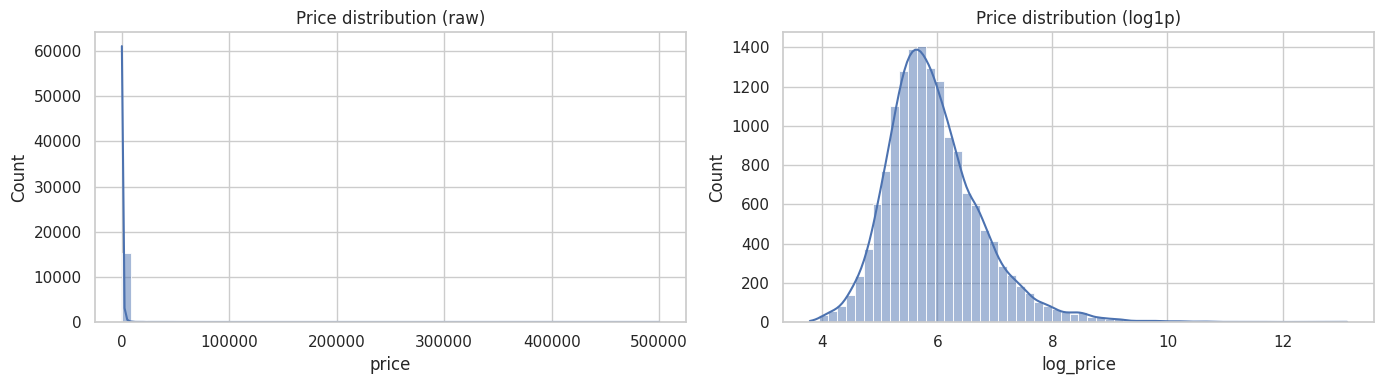

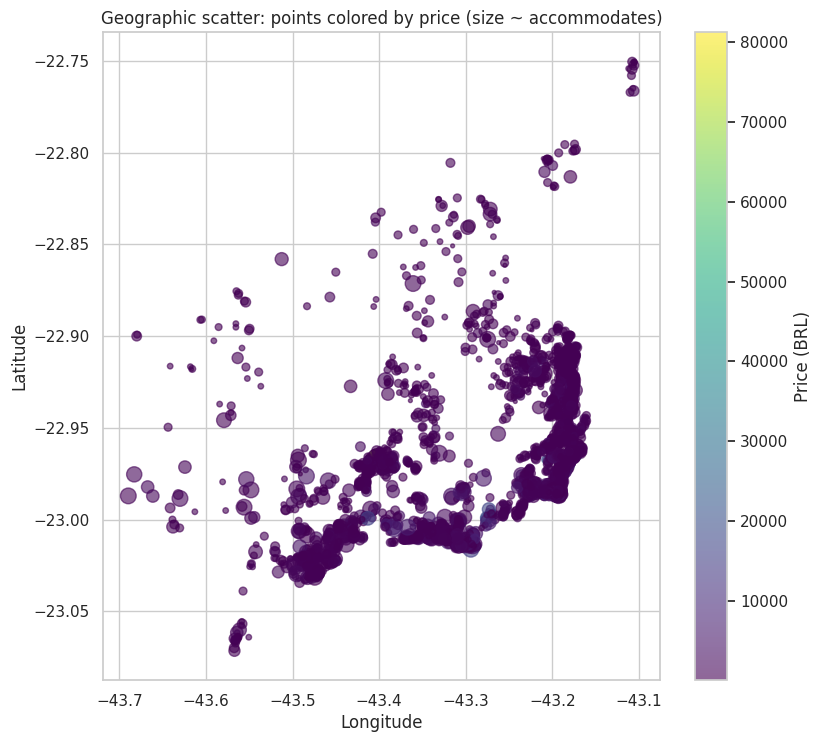

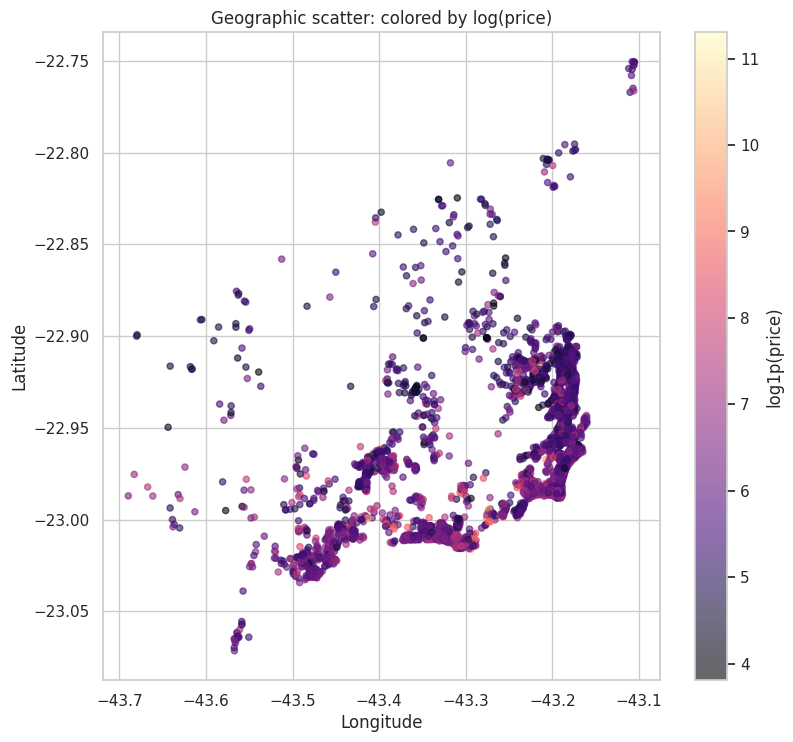

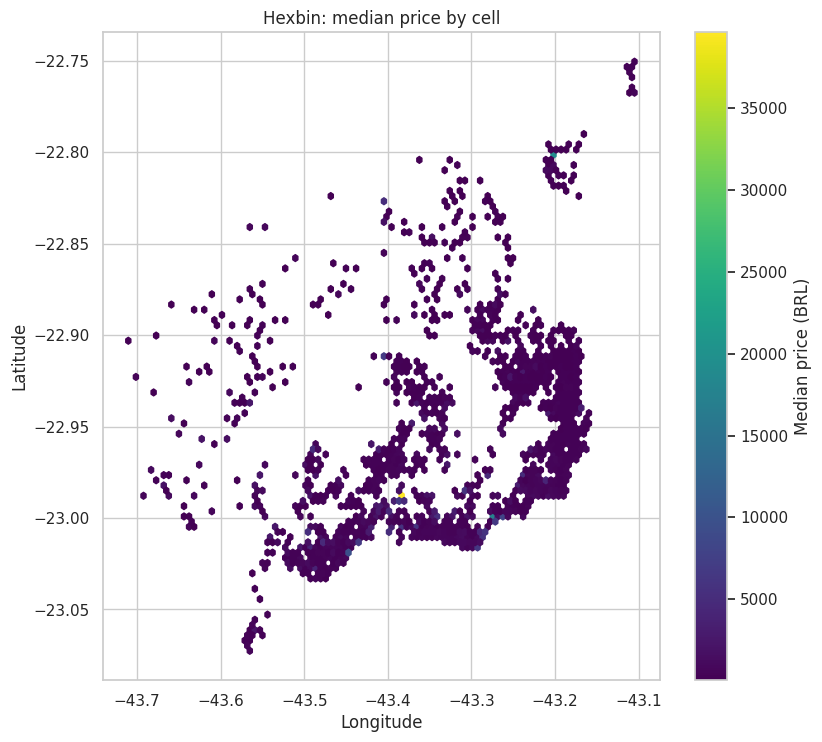

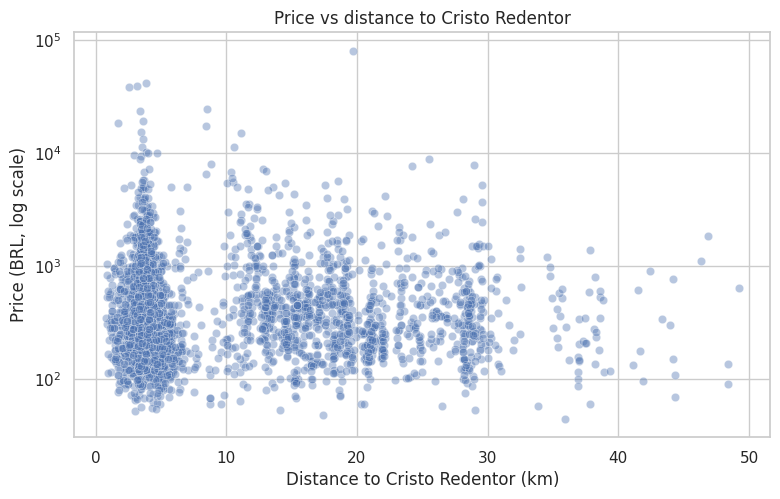

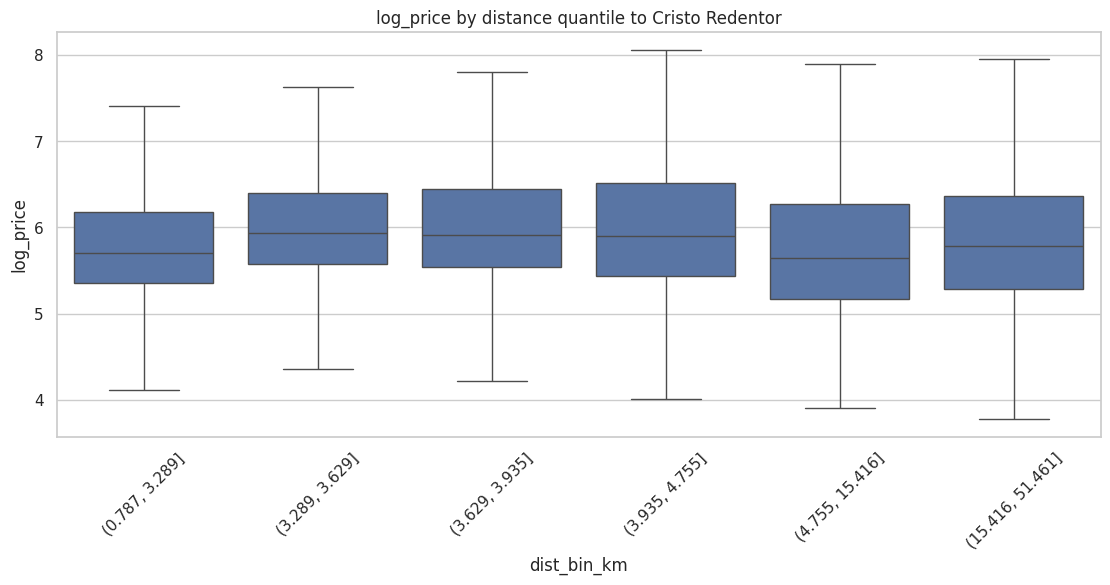

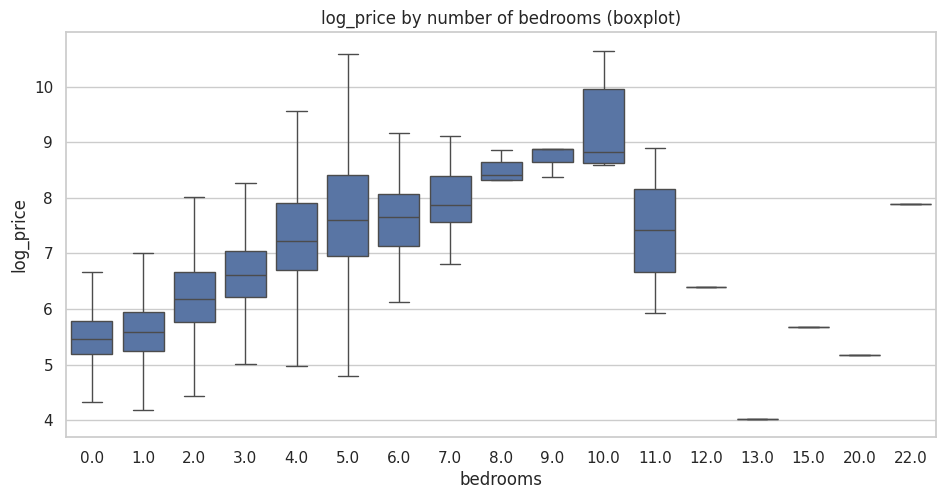

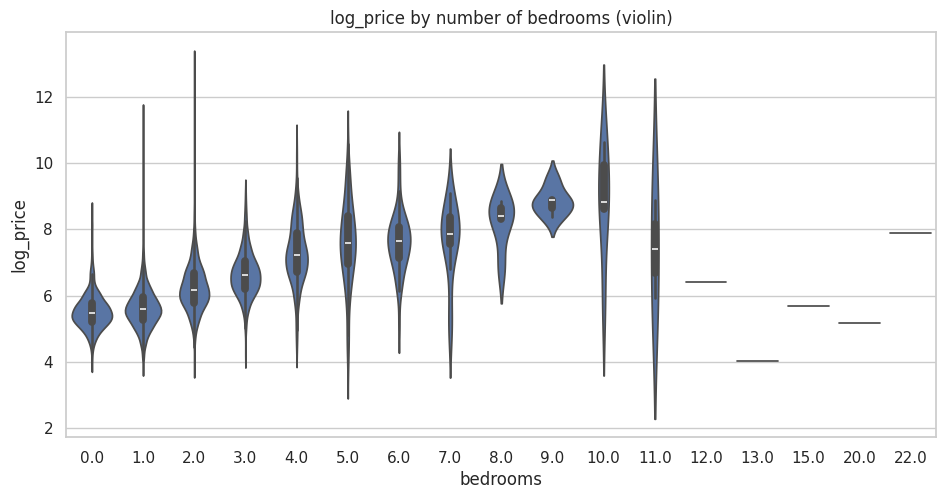

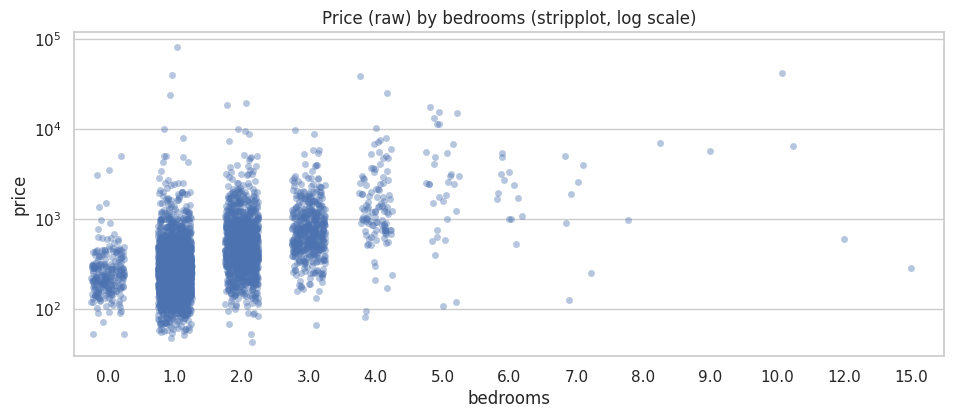

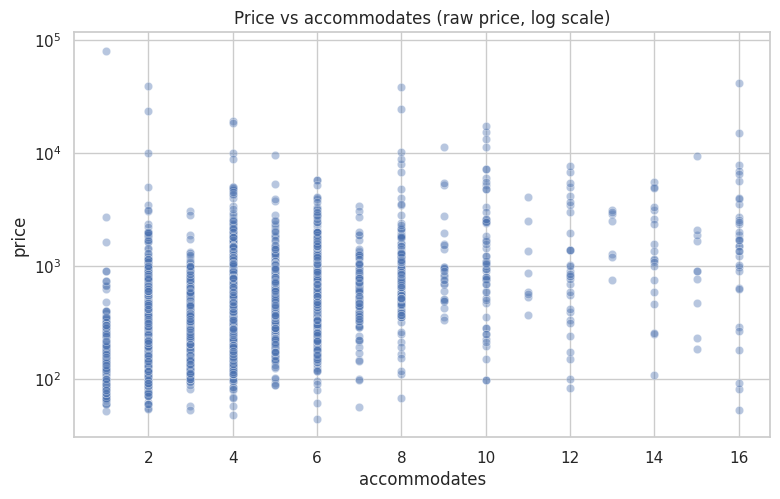

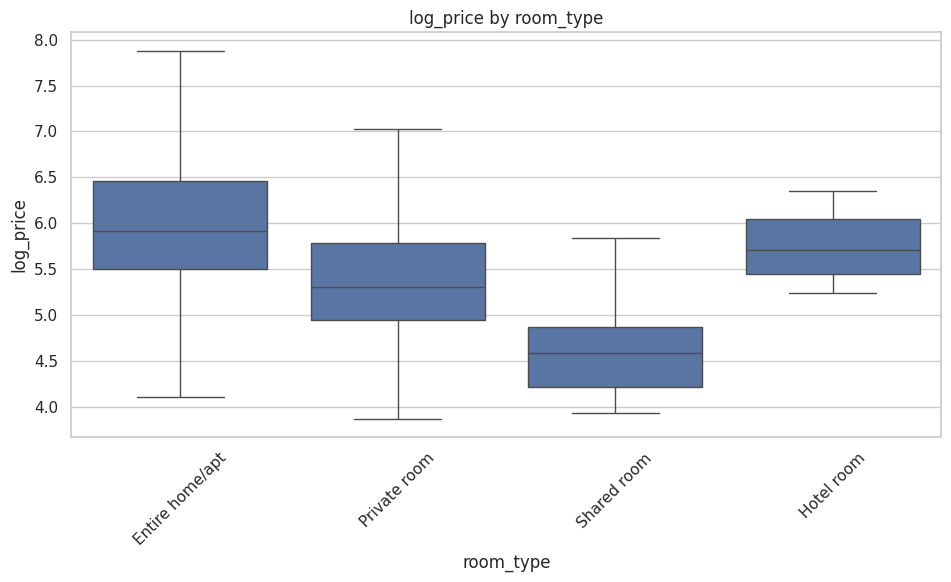

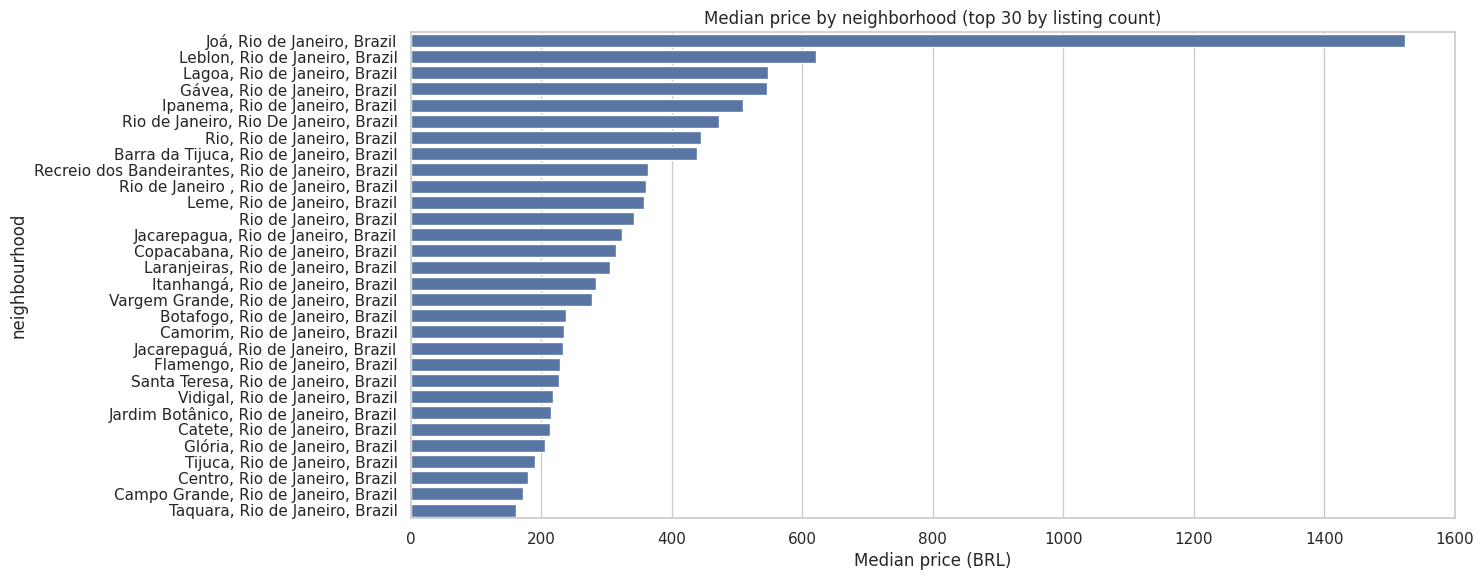

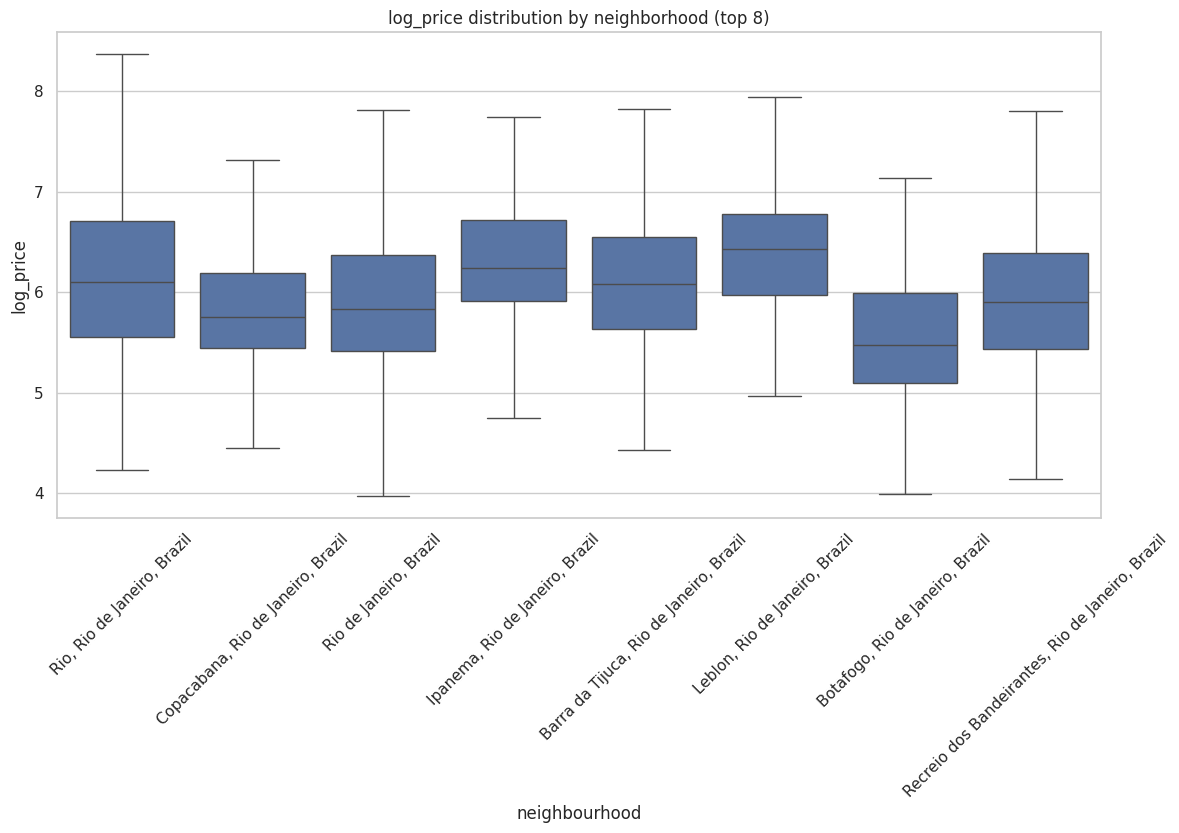

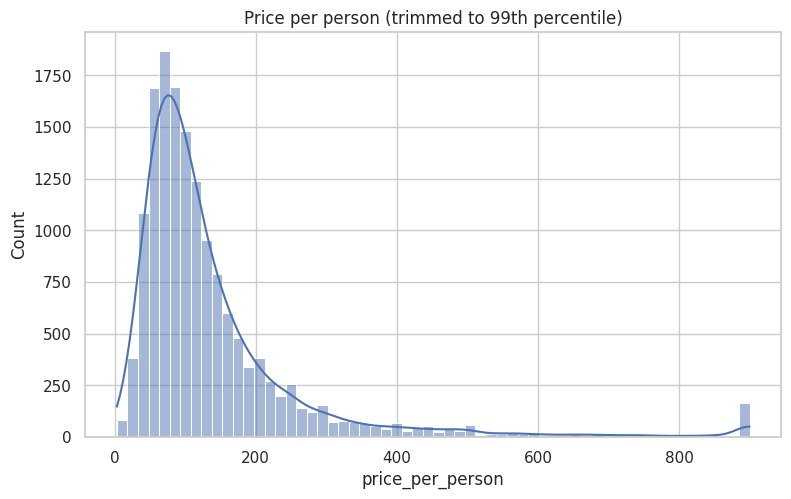

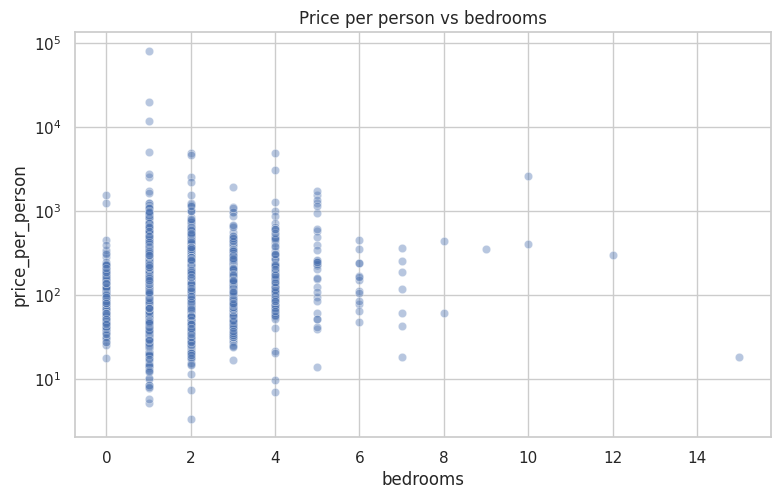

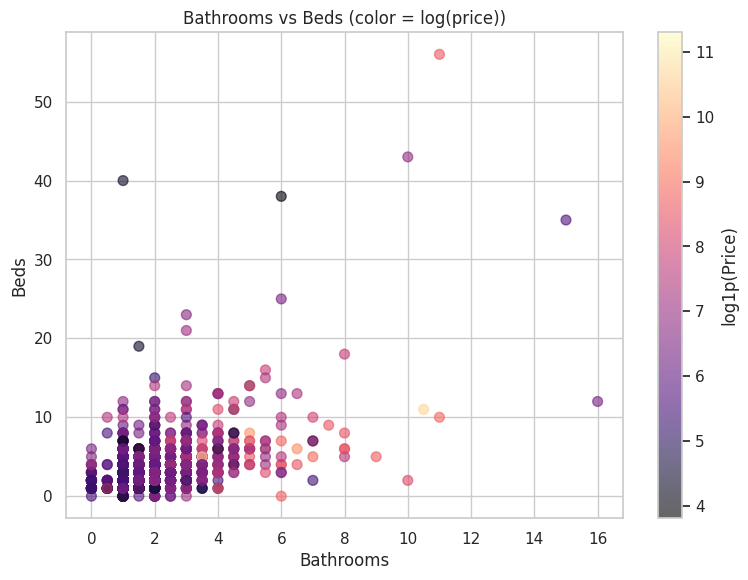

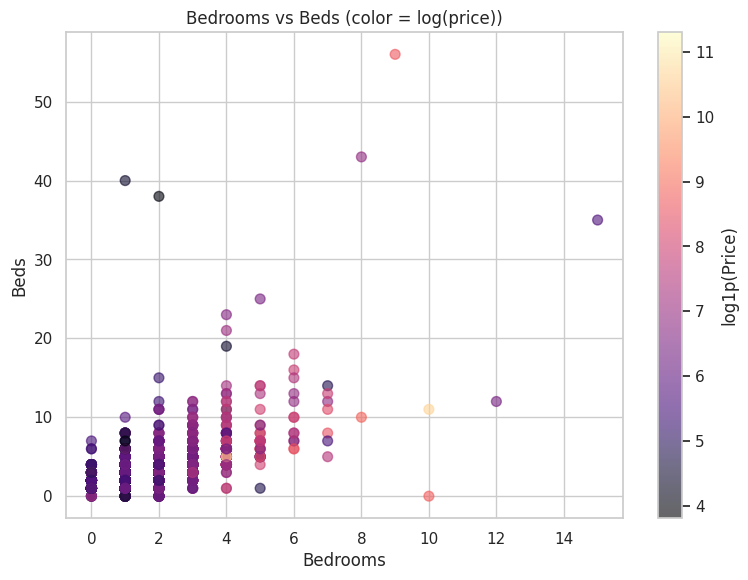

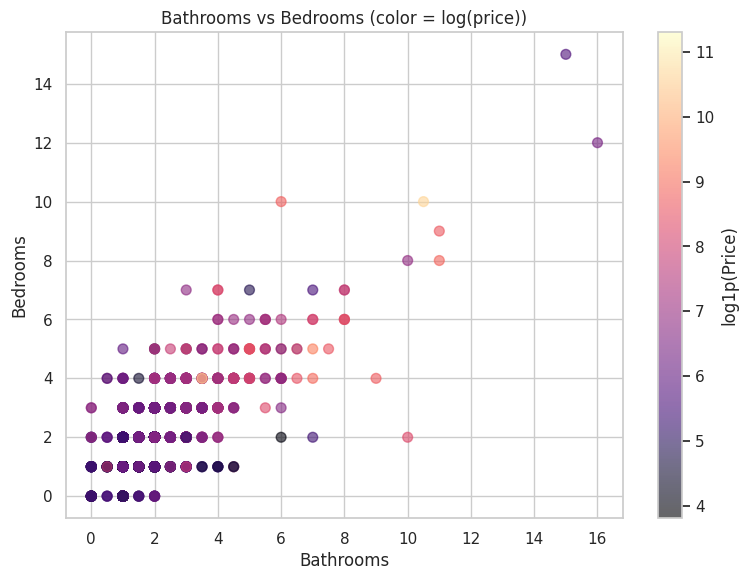


Pearson correlation with price:
 price                1.00
log_price            0.28
bathrooms            0.12
bedrooms             0.11
accommodates         0.09
beds                 0.07
dist_km_to_cristo    0.00
number_of_reviews   -0.04
Name: price, dtype: float64

Spearman correlation with price:
 price                1.00
log_price            1.00
bedrooms             0.54
bathrooms            0.51
accommodates         0.49
beds                 0.40
dist_km_to_cristo   -0.03
number_of_reviews   -0.23
Name: price, dtype: float64

Geo-aware EDA complete. Inspect the figures above. If you want interactive map, I can add a folium example next.


In [36]:
# ================
# Geo-aware EDA: location vs price + other relations
# ================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

sns.set(style="whitegrid")
%matplotlib inline

# Use rio_for_eda if present, otherwise rio_listings
df_eda = globals().get('rio_for_eda', globals().get('rio_listings', None))
if df_eda is None:
    raise RuntimeError("No rio_for_eda or rio_listings found in namespace. Run previous EDA cell first.")

# Make a working copy
df = df_eda.copy()

# Ensure price and log_price exist
if 'price' not in df.columns:
    raise RuntimeError("price column not found in df")
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price']).reset_index(drop=True)
if 'log_price' not in df.columns:
    df['log_price'] = np.log1p(df['price'].clip(lower=0))

# --- detect latitude/longitude columns (flexible) ---
lat_candidates = ['latitude','lat','Latitude','LAT']
lon_candidates = ['longitude','lon','lng','Longitude','LON']

lat_col = next((c for c in lat_candidates if c in df.columns), None)
lon_col = next((c for c in lon_candidates if c in df.columns), None)

# --- detect neighborhood / zipcode / room type if present ---
neigh_candidates = ['neighbourhood', 'neighbourhood_cleansed', 'neighborhood', 'neighbourhood_group', 'city', 'zipcode']
neigh_col = next((c for c in neigh_candidates if c in df.columns), None)

room_candidates = ['room_type', 'room type']
room_col = next((c for c in room_candidates if c in df.columns), None)

print("Detected columns -> lat:", lat_col, "lon:", lon_col, "neigh:", neigh_col, "room_type:", room_col)
print("Rows available for EDA:", len(df))

# ============================
# Price distribution (raw + log) - keep this visible
# ============================
fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df['price'], bins=60, kde=True, ax=axes[0])
axes[0].set_title('Price distribution (raw)')
sns.histplot(df['log_price'], bins=60, kde=True, ax=axes[1])
axes[1].set_title('Price distribution (log1p)')
plt.tight_layout()
plt.show()

# ============================
# Geographic scatter: color by price and size by accommodates
# ============================
if lat_col and lon_col:
    # downsample for plotting (max 7000 points)
    nplot = min(len(df), 7000)
    sample = df.sample(n=nplot, random_state=42)

    plt.figure(figsize=(8,8))
    sc = plt.scatter(
        sample[lon_col], sample[lat_col],
        c=sample['price'], cmap='viridis',
        s=(sample.get('accommodates', pd.Series(1, index=sample.index)).clip(1)*8),
        alpha=0.6
    )
    plt.colorbar(sc, label='Price (BRL)')
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.title('Geographic scatter: points colored by price (size ~ accommodates)')
    plt.show()

    # Scatter colored by log_price (better dynamic range)
    plt.figure(figsize=(8,8))
    sc = plt.scatter(sample[lon_col], sample[lat_col], c=sample['log_price'], cmap='magma', s=20, alpha=0.6)
    plt.colorbar(sc, label='log1p(price)')
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.title('Geographic scatter: colored by log(price)')
    plt.show()

    # Hexbin aggregation: median price per hex cell
    plt.figure(figsize=(8,8))
    hb = plt.hexbin(df[lon_col], df[lat_col], C=df['price'], gridsize=100, reduce_C_function=np.nanmedian, cmap='viridis')
    plt.colorbar(hb, label='Median price (BRL)')
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.title('Hexbin: median price by cell')
    plt.show()
else:
    print("Latitude/Longitude not found - skipping geographic plots.")

# ============================
# Distance from reference point vs price
#    (reference: Cristo Redentor coords: lat=-22.9519, lon=-43.2105)
# ============================
def haversine_km(lat1, lon1, lat2, lon2):
    # all args in decimal degrees; returns km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    R = 6371.0
    return R * c

if lat_col and lon_col:
    ref_lat, ref_lon = -22.9519, -43.2105
    df['dist_km_to_cristo'] = df.apply(lambda r: haversine_km(ref_lat, ref_lon, r[lat_col], r[lon_col]), axis=1)
    # Scatter price vs distance
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='dist_km_to_cristo', y='price', data=df.sample(n=min(len(df),5000), random_state=42), alpha=0.4)
    plt.yscale('log')  # show multiplicative trend easier
    plt.xlabel('Distance to Cristo Redentor (km)')
    plt.ylabel('Price (BRL, log scale)')
    plt.title('Price vs distance to Cristo Redentor')
    plt.show()

    # Boxplot by distance bins
    df['dist_bin_km'] = pd.qcut(df['dist_km_to_cristo'], q=6, duplicates='drop')
    plt.figure(figsize=(12,5))
    sns.boxplot(x='dist_bin_km', y='log_price', data=df, showfliers=False)
    plt.xticks(rotation=45)
    plt.title('log_price by distance quantile to Cristo Redentor')
    plt.show()
else:
    print("Latitude/Longitude not found - skipping distance analysis.")

# ============================
# Bedrooms / Accommodates vs Price (box + violin + scatter)
# ============================
# boxplot: bedrooms vs price (use log_price for stability)
if 'bedrooms' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='bedrooms', y='log_price', data=df, showfliers=False)
    plt.title('log_price by number of bedrooms (boxplot)')
    plt.show()

    plt.figure(figsize=(10,5))
    sns.violinplot(x='bedrooms', y='log_price', data=df)
    plt.title('log_price by number of bedrooms (violin)')
    plt.show()

    # scatter: bedrooms vs price raw (jitter)
    plt.figure(figsize=(10,4))
    sns.stripplot(x='bedrooms', y='price', data=df.sample(n=min(len(df),5000), random_state=42), jitter=0.25, alpha=0.4)
    plt.yscale('log')
    plt.title('Price (raw) by bedrooms (stripplot, log scale)')
    plt.show()
else:
    print("bedrooms column not present - skipping bedrooms plots.")

# Accommodates vs price scatter
if 'accommodates' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='accommodates', y='price', data=df.sample(n=min(len(df),5000), random_state=42), alpha=0.4)
    plt.yscale('log')
    plt.title('Price vs accommodates (raw price, log scale)')
    plt.show()

# ============================
# room_type or neighbourhood effect on price (boxplots / bar median)
# ============================
if room_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=room_col, y='log_price', data=df, showfliers=False)
    plt.title('log_price by room_type')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("room_type not found - skipping room type plot.")

if neigh_col:
    # median price per neighborhood (only top-by-count neighborhoods)
    neigh_counts = df[neigh_col].value_counts().nlargest(30)
    top_neigh = neigh_counts.index.tolist()
    agg = df[df[neigh_col].isin(top_neigh)].groupby(neigh_col)['price'].median().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=agg.values, y=agg.index, orient='h')
    plt.title('Median price by neighborhood (top 30 by listing count)')
    plt.xlabel('Median price (BRL)')
    plt.show()

    # boxplot for the most frequent 8 neighborhoods
    top8 = neigh_counts.index[:8].tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=neigh_col, y='log_price', data=df[df[neigh_col].isin(top8)], showfliers=False)
    plt.title('log_price distribution by neighborhood (top 8)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("neighborhood/zipcode not found - skipping neighborhood analysis.")

# ============================
# Price per person and bedrooms_per_person analysis
# ============================
if 'price_per_person' not in df.columns:
    df['price_per_person'] = (df['price'] / df['accommodates'].replace(0, np.nan)).fillna(0)

plt.figure(figsize=(8,5))
sns.histplot(df['price_per_person'].clip(upper=df['price_per_person'].quantile(0.99)), bins=60, kde=True)
plt.title('Price per person (trimmed to 99th percentile)')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='bedrooms', y='price_per_person', data=df.sample(n=min(len(df),5000), random_state=42), alpha=0.4)
plt.yscale('log')
plt.title('Price per person vs bedrooms')
plt.show()

# ============================
# Additional feature interaction plots (scatter, color = log_price)
# ============================

# Downsample para até 5000 pontos
sample_size = min(len(df), 5000)
df_sample = df.sample(n=sample_size, random_state=42)

# Bathrooms x Beds
if 'bathrooms' in df.columns and 'beds' in df.columns:
    plt.figure(figsize=(8,6))
    sc = plt.scatter(
        df_sample['bathrooms'], df_sample['beds'],
        c=df_sample['log_price'], cmap='magma', s=50, alpha=0.6
    )
    plt.colorbar(sc, label='log1p(Price)')
    plt.xlabel('Bathrooms')
    plt.ylabel('Beds')
    plt.title('Bathrooms vs Beds (color = log(price))')
    plt.show()
else:
    print("bathrooms or beds column missing - skipping Bathrooms x Beds plot.")

# Bedrooms x Beds
if 'bedrooms' in df.columns and 'beds' in df.columns:
    plt.figure(figsize=(8,6))
    sc = plt.scatter(
        df_sample['bedrooms'], df_sample['beds'],
        c=df_sample['log_price'], cmap='magma', s=50, alpha=0.6
    )
    plt.colorbar(sc, label='log1p(Price)')
    plt.xlabel('Bedrooms')
    plt.ylabel('Beds')
    plt.title('Bedrooms vs Beds (color = log(price))')
    plt.show()
else:
    print("bedrooms or beds column missing - skipping Bedrooms x Beds plot.")

# Bathrooms x Bedrooms
if 'bathrooms' in df.columns and 'bedrooms' in df.columns:
    plt.figure(figsize=(8,6))
    sc = plt.scatter(
        df_sample['bathrooms'], df_sample['bedrooms'],
        c=df_sample['log_price'], cmap='magma', s=50, alpha=0.6
    )
    plt.colorbar(sc, label='log1p(Price)')
    plt.xlabel('Bathrooms')
    plt.ylabel('Bedrooms')
    plt.title('Bathrooms vs Bedrooms (color = log(price))')
    plt.show()
else:
    print("bathrooms or bedrooms column missing - skipping Bathrooms x Bedrooms plot.")


# ============================
# Numeric correlations (print numeric correlation coefficients)
# ============================
numeric_for_corr = ['price','log_price','bedrooms','bathrooms','beds','accommodates','number_of_reviews']
if 'dist_km_to_cristo' in df.columns:
    numeric_for_corr.append('dist_km_to_cristo')

corr_pearson = df[numeric_for_corr].corr(method='pearson')['price'].sort_values(ascending=False)
corr_spearman = df[numeric_for_corr].corr(method='spearman')['price'].sort_values(ascending=False)

print("\nPearson correlation with price:\n", corr_pearson)
print("\nSpearman correlation with price:\n", corr_spearman)

# Done
print("\nGeo-aware EDA complete. Inspect the figures above. If you want interactive map, I can add a folium example next.")


## Robust IQR-based outlier filtering


In [37]:
def _iqr_bounds(series: pd.Series, k: float = 1.5):
    """
    Compute lower/upper bounds for outlier detection using the IQR rule.

    Parameters
    ----------
    series : pd.Series
        Numeric series (non-numeric should be filtered before).
    k : float, default 1.5
        Whisker length multiplier (1.5 = Tukey; 3.0 = more tolerant).

    Returns
    -------
    low : float
        Lower bound (Q1 - k * IQR).
    up : float
        Upper bound (Q3 + k * IQR).
    stats : dict
        Dict with Q1, Q3, IQR.
    """
    if not pd.api.types.is_numeric_dtype(series):
        raise TypeError("Series must be numeric to compute IQR bounds.")

    if series.empty:
        raise ValueError("Series is empty; cannot compute IQR bounds.")

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    up = q3 + k * iqr
    return low, up, {"Q1": q1, "Q3": q3, "IQR": iqr}



def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list[str],
    k: float = 1.5,
    inclusive: bool = True,
    dropna: bool = True,
):
    """
    Remove rows with outliers per-column using the IQR rule.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list of str
        Columns to evaluate for outliers (must be numeric).
    k : float, default 1.5
        Whisker length multiplier (1.5 = standard; 3.0 = lenient).
    inclusive : bool, default True
        If True, keep values exactly on the bounds; otherwise use strict inequality.
    dropna : bool, default True
        If True, drop rows with NaN in the selected numeric columns prior to filtering.

    Returns
    -------
    cleaned : pd.DataFrame
        DataFrame with outlier rows removed.
    info : dict
        Summary with input/output row counts and per-column bounds/statistics.
    """
    data = df.copy()

    # Filter only numeric columns from the provided list
    numeric_cols = [c for c in columns if pd.api.types.is_numeric_dtype(data[c])]
    skipped_cols = [c for c in columns if c not in numeric_cols]

    if not numeric_cols:
        raise ValueError("No numeric columns found in the provided list.")

    # Optionally drop NaNs only in numeric columns
    if dropna:
        data = data.dropna(subset=numeric_cols)

    before = len(data)
    bounds = {}
    mask = pd.Series(True, index=data.index)

    for c in numeric_cols:
        low, up, stats = _iqr_bounds(data[c].dropna(), k=k)
        bounds[c] = {"low": low, "up": up, **stats}

        if inclusive:
            m = (data[c] >= low) & (data[c] <= up)
        else:
            m = (data[c] > low) & (data[c] < up)

        mask &= m

    cleaned = data.loc[mask].copy()
    info = {
        "rows_in": before,
        "rows_out": len(cleaned),
        "rows_removed": before - len(cleaned),
        "k": k,
        "inclusive": inclusive,
        "bounds": bounds,
        "skipped_cols": skipped_cols,
    }
    return cleaned, info

In [38]:
# Assumes you already have:
# - df (your full dataset)
# - target_columns = ["accommodates","bathrooms","bedrooms","beds","minimum_nights",
#                     "maximum_nights","number_of_reviews","price"]
# - rio_listings = df[target_columns].copy()   # your prepared subset

# Copy the dataset to work on IQR filtering
rio_iqr_input = rio_listings[target_columns].copy()

# Remove outliers with default Tukey rule (k=1.5) and inclusive bounds
rio_iqr, summary = remove_outliers_iqr(
    df=rio_iqr_input,
    columns=target_columns,
    k=1.5,
    inclusive=True,
    dropna=True,
)

print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']}")
print("Per-column bounds (low/up):")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

rio_iqr.head()

Rows before:  15324
Rows after:   8417
Removed:      6907
Per-column bounds (low/up):
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - latitude: [-23.026, -22.916]  (Q1=-22.984, Q3=-22.957, IQR=0.027)
  - longitude: [-43.373, -43.071]  (Q1=-43.260, Q3=-43.184, IQR=0.076)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [0.500, 4.500]  (Q1=2.000, Q3=3.000, IQR=1.000)
  - maximum_nights: [-995.000, 1765.000]  (Q1=40.000, Q3=730.000, IQR=690.000)
  - number_of_reviews: [-70.000, 130.000]  (Q1=5.000, Q3=55.000, IQR=50.000)
  - price: [-327.500, 1132.500]  (Q1=220.000, Q3=585.000, IQR=365.000)


,accommodates,neighbourhood,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,room_type
4,4,"Rio, Rio de Janeiro, Brazil",-22.97,-43.19,1.00,1.00,2.00,2,28,28,220.00,Entire home/apt
7,4,"Rio de Janeiro, Brazil",-22.94,-43.19,2.00,2.00,2.00,3,30,38,399.00,Entire home/apt
9,4,"Rio de Janeiro, Brazil",-22.96,-43.17,2.00,2.00,3.00,2,1125,102,491.00,Entire home/apt
12,2,"Leme, Rio de Janeiro, Brazil",-22.96,-43.17,1.00,1.00,2.00,2,31,65,320.00,Entire home/apt
15,1,"Rio de Janeiro, Brazil",-22.96,-43.17,1.50,1.00,0.00,1,365,7,87.00,Shared room


In [39]:
rio_iqr.price.describe()

,price
count,8417.00
mean,391.66
std,220.69
min,52.00
25%,230.00
50%,331.00
75%,500.00
max,1131.00


## Correlation Heatmap of Rio Listings Features

Correlation of features (numeric + one-hot encoded categorical) with target 'price':

price                     1.00
bedrooms                  0.48
bathrooms                 0.45
accommodates              0.41
beds                      0.33
                          ... 
room_type_Shared room    -0.07
longitude                -0.09
number_of_reviews        -0.13
room_type_Private room   -0.26
latitude                 -0.29
Name: price, Length: 134, dtype: float64


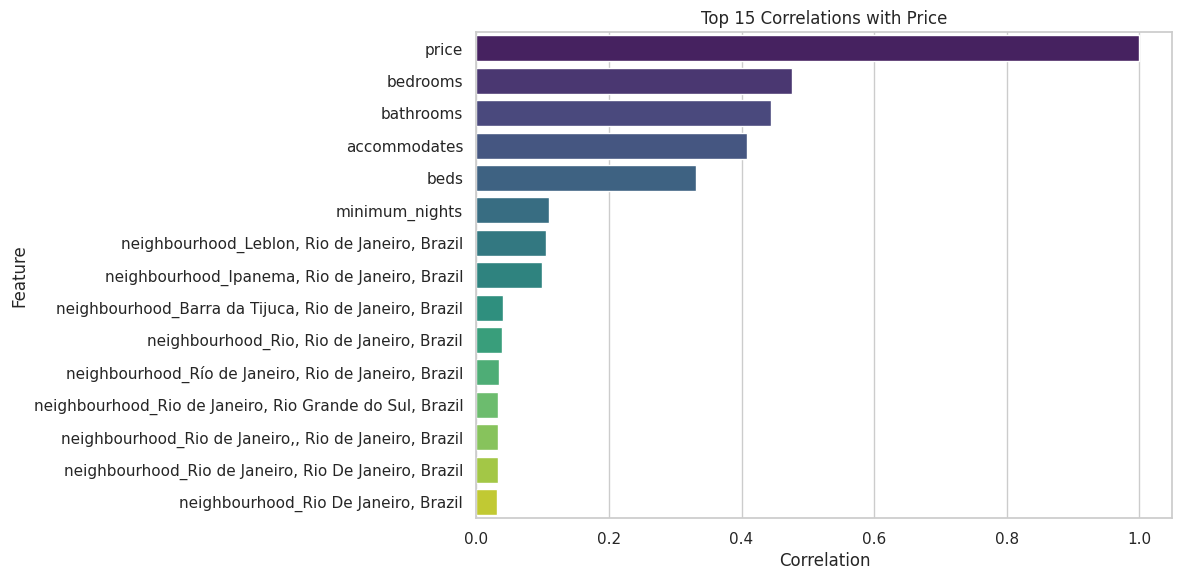

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar o dataset para não alterar o original
df_encoded = rio_iqr.copy()

# Aplica One-Hot Encoding em todas as colunas categóricas
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Agora todas as colunas são numéricas
corr_matrix = df_encoded.corr(method="pearson")

# Correlações com o preço
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features (numeric + one-hot encoded categorical) with target 'price':\n")
print(price_corr)

# Visualização grafica das correlações mais fortes
plt.figure(figsize=(8,6))
sns.barplot(x=price_corr.values[:15], y=price_corr.index[:15], palette="viridis")
plt.title("Top 15 Correlations with Price")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


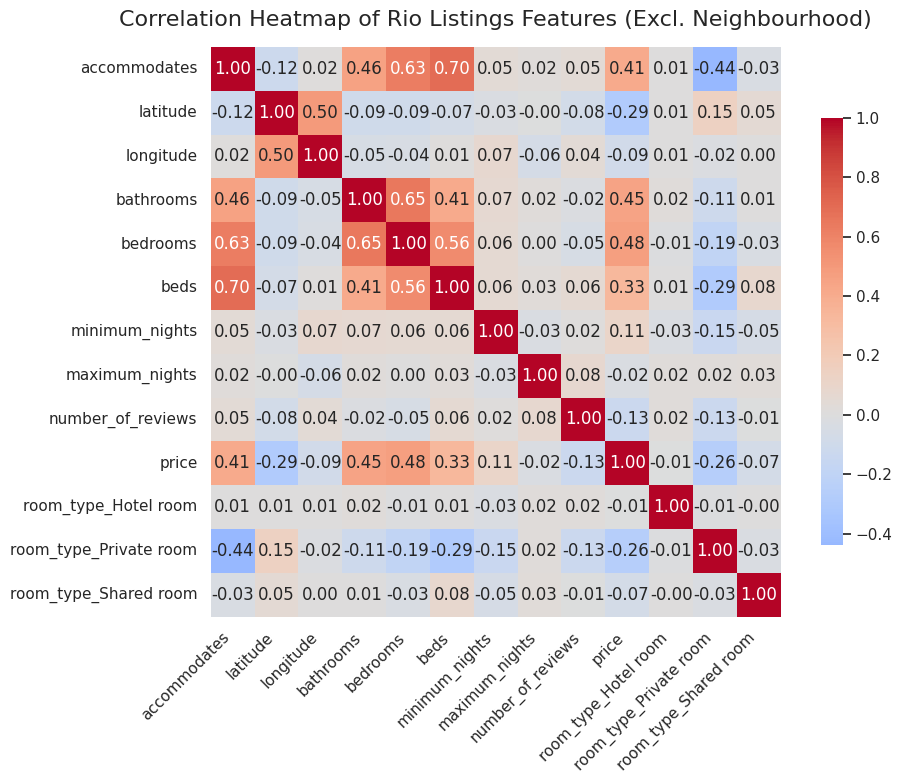

In [41]:
# Criar uma cópia sem colunas da vizinhança
corr_matrix_filtered = corr_matrix.drop(
    columns=[c for c in corr_matrix.columns if c.startswith("neighbourhood_")],
    index=[c for c in corr_matrix.index if c.startswith("neighbourhood_")]
)

# Plotar apenas as features relevantes (sem neighbourhood)
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix_filtered,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Heatmap of Rio Listings Features (Excl. Neighbourhood)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# Interpretation / Feature Justification

Interpretation of EDA results and justification for feature selection:

1. Geographic influence:
   - The scatter and hexbin plots show that properties closer to central or tourist areas
     (e.g., near Cristo Redentor) tend to have higher prices.
   - This indicates that latitude and longitude are informative features and can help
     the model capture location-based pricing patterns.

2. Property characteristics:
   - Bedrooms, bathrooms, and beds all show a positive correlation with price (log scale).
   - Larger properties with more beds/rooms tend to command higher nightly rates.
   - Scatter plots of Bathrooms vs Beds, Bedrooms vs Beds, and Bathrooms vs Bedrooms
     colored by log(price) reinforce these relationships.

3. Capacity and pricing:
   - Accommodates (number of guests a property can host) also correlates positively with price.
   - Price per person feature shows the per-capita cost trend, which is useful for models
     trying to account for efficiency of space.

4. Room type and neighborhood:
   - Boxplots by room_type and neighborhood indicate systematic price differences across
     these categorical variables.
   - One-hot encoding of these categorical features will allow the model to leverage this
     structured information.

5. Derived distance feature:
   - Distance to Cristo Redentor shows a gradual decline in price with increasing distance,
     suggesting location-based depreciation that is not captured by coordinates alone.
   - Including this derived feature can improve the model's spatial awareness.

Conclusion:
- Features selected for modeling include numeric attributes (bedrooms, bathrooms, beds, accommodates),
  categorical attributes (room_type, neighborhood), and derived spatial features (latitude, longitude,
  distance to landmark).
- Using log(price) as target stabilizes variance and reduces skewness, improving model training.
- These insights justify including the above variables in a regression model to predict nightly price.


# End-to-End Solution Pipeline in PyTorch

## Import

In [42]:
!pip install lazypredict

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

=== CARREGAMENTO E PRÉ-PROCESSAMENTO ===
Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 8417 entries, 4 to 42003
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       8417 non-null   int64  
 1   neighbourhood      8417 non-null   object 
 2   latitude           8417 non-null   float64
 3   longitude          8417 non-null   float64
 4   bathrooms          8417 non-null   float64
 5   bedrooms           8417 non-null   float64
 6   beds               8417 non-null   float64
 7   minimum_nights     8417 non-null   int64  
 8   maximum_nights     8417 non-null   int64  
 9   number_of_reviews  8417 non-null   int64  
 10  price              8417 non-null   float64
 11  room_type          8417 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 854.9+ KB

Tamanho original: 8417
Tamanho após filtro: 8417

=== FEATURES ===
Categóricas: ['neighbourhood

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 6733, number of used features: 27
[LightGBM] [Info] Start training from score 392.012327
Colunas disponíveis no resultado:
['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken']

=== TOP 10 MELHORES MODELOS ===
⚠️  Coluna 'MAE' não disponível
                               R-Squared   RMSE  Time Taken
Model                                                      
LGBMRegressor                       0.45 167.21        0.23
HistGradientBoostingRegressor       0.44 167.77        1.55
XGBRegressor                        0.43 169.85        1.20
RandomForestRegressor               0.43 169.99        7.38
GradientBoostingRegressor           0.42 171.03        3.54
ExtraTreesRegress

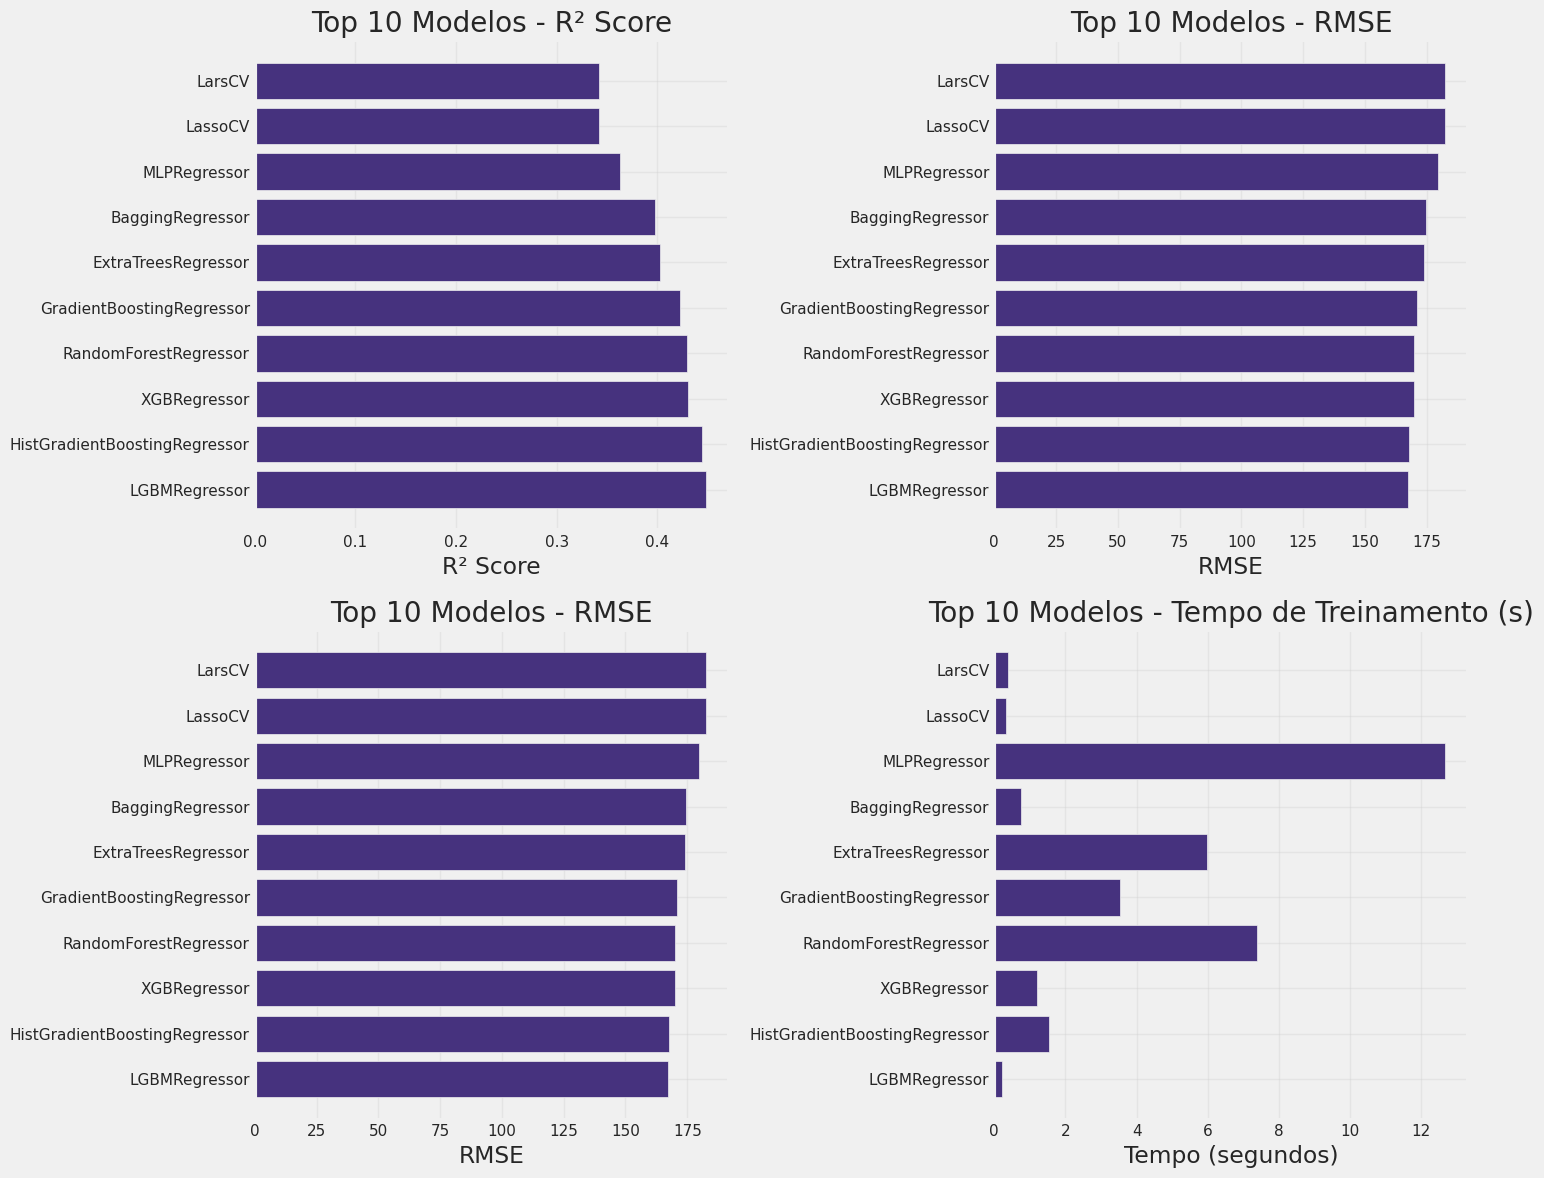


TREINANDO MELHOR MODELO
Melhor modelo por R²: LGBMRegressor
R² Score: 0.4482

Métricas do melhor modelo:
R-Squared: 0.4482
RMSE: 167.2095

=== MÉTRICAS FINAIS NO TESTE ===
R² Score: 0.4482
RMSE: 167.2095
MAE: 118.8008


In [44]:
# Configurações de visualização
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")
%matplotlib inline

# -------------------------------------------------------------
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# -------------------------------------------------------------
print("=== CARREGAMENTO E PRÉ-PROCESSAMENTO ===")

# Verificar dados
print("Informações do dataset:")
rio_iqr.info()
print(f"\nTamanho original: {len(rio_iqr)}")

# Filtrar preços válidos
valid_mask = (~rio_iqr['price'].isna()) & (rio_iqr['price'] > 0)
rio_iqr_filtered = rio_iqr[valid_mask].copy()
print(f"Tamanho após filtro: {len(rio_iqr_filtered)}")

# -------------------------------------------------------------
# 2. SEPARAÇÃO DE FEATURES
# -------------------------------------------------------------
categorical_cols = ['neighbourhood', 'room_type']
numerical_cols = ['accommodates', 'latitude', 'longitude', 'bathrooms',
                 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
                 'number_of_reviews']

print("\n=== FEATURES ===")
print("Categóricas:", categorical_cols)
print("Numéricas:", numerical_cols)

# -------------------------------------------------------------
# 3. ONE-HOT ENCODING E PREPARAÇÃO FINAL (CORRIGIDO)
# -------------------------------------------------------------
# One-hot encoding - APENAS NAS CATEGÓRICAS
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = ohe.fit_transform(rio_iqr_filtered[categorical_cols])
categorical_df = pd.DataFrame(categorical_data,
                             columns=ohe.get_feature_names_out(categorical_cols))

# Combinar com numéricas - USANDO O MESMO ÍNDICE
numerical_df = rio_iqr_filtered[numerical_cols].reset_index(drop=True)
categorical_df = categorical_df.reset_index(drop=True)

# Garantir que ambos tenham o mesmo número de linhas
if len(numerical_df) != len(categorical_df):
    print(f"⚠️  Aviso: Numéricas ({len(numerical_df)}) != Categóricas ({len(categorical_df)})")
    min_rows = min(len(numerical_df), len(categorical_df))
    numerical_df = numerical_df.iloc[:min_rows]
    categorical_df = categorical_df.iloc[:min_rows]

rio_iqr_encoded = pd.concat([numerical_df, categorical_df], axis=1)

# Target - usar o mesmo número de amostras
y = rio_iqr_filtered['price'].values
if len(y) != len(rio_iqr_encoded):
    print(f"⚠️  Ajustando target: {len(y)} -> {len(rio_iqr_encoded)} amostras")
    y = y[:len(rio_iqr_encoded)]

# Preencher NaN
rio_iqr_encoded = rio_iqr_encoded.fillna(0)
X = rio_iqr_encoded.values

print(f"\nShape final - X: {X.shape}, y: {y.shape}")

# Verificar se os shapes são consistentes
if X.shape[0] != y.shape[0]:
    print("❌ ERRO: Shapes ainda inconsistentes!")
    min_samples = min(X.shape[0], y.shape[0])
    X = X[:min_samples]
    y = y[:min_samples]
    print(f"✅ Corrigido: X {X.shape}, y {y.shape}")

# -------------------------------------------------------------
# 4. SALVAR PREPROCESSADORES
# -------------------------------------------------------------
joblib.dump(ohe, 'onehot_encoder.pkl')
feature_cols = rio_iqr_encoded.columns.tolist()
joblib.dump(feature_cols, 'feature_columns.pkl')
print(f"\nPreprocessadores salvos: {len(feature_cols)} features")

# -------------------------------------------------------------
# 5. DIVISÃO TREINO/TESTE
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n=== DIVISÃO DOS DADOS ===")
print(f"Treino: X {X_train.shape}, y {y_train.shape}")
print(f"Teste:  X {X_test.shape}, y {y_test.shape}")

# -------------------------------------------------------------
# 6. LAZYPREDICT - COMPARAÇÃO DE MODELOS (CORRIGIDO)
# -------------------------------------------------------------
print("\n" + "="*60)
print("LAZYPREDICT - COMPARANDO 30+ MODELOS DE ML")
print("="*60)

# Executar LazyPredict
reg = LazyRegressor(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    predictions=False,
    random_state=42
)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Verificar quais colunas estão disponíveis
print("Colunas disponíveis no resultado:")
print(models.columns.tolist())

# Mostrar top 10 melhores modelos - USANDO COLUNAS DISPONÍVEIS
print("\n=== TOP 10 MELHORES MODELOS ===")
top_models = models.head(10)

# Selecionar colunas disponíveis
available_columns = []
for col in ['R-Squared', 'RMSE', 'MAE', 'Time Taken']:
    if col in models.columns:
        available_columns.append(col)
    else:
        print(f"⚠️  Coluna '{col}' não disponível")

if available_columns:
    print(top_models[available_columns])
else:
    # Mostrar todas as colunas se nenhuma das padrão estiver disponível
    print(top_models)

# -------------------------------------------------------------
# 7. VISUALIZAÇÃO DOS RESULTADOS (CORRIGIDO)
# -------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: R² Score (se disponível)
if 'R-Squared' in models.columns:
    axes[0, 0].barh(top_models.index[:10], top_models['R-Squared'][:10])
    axes[0, 0].set_title('Top 10 Modelos - R² Score')
    axes[0, 0].set_xlabel('R² Score')
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'R-Squared não disponível',
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('R-Squared não disponível')

# Gráfico 2: RMSE (se disponível)
if 'RMSE' in models.columns:
    axes[0, 1].barh(top_models.index[:10], top_models['RMSE'][:10])
    axes[0, 1].set_title('Top 10 Modelos - RMSE')
    axes[0, 1].set_xlabel('RMSE')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'RMSE não disponível',
                   ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('RMSE não disponível')

# Gráfico 3: MAE ou alternativa
if 'MAE' in models.columns:
    axes[1, 0].barh(top_models.index[:10], top_models['MAE'][:10])
    axes[1, 0].set_title('Top 10 Modelos - MAE')
    axes[1, 0].set_xlabel('MAE')
    axes[1, 0].grid(True, alpha=0.3)
else:
    # Tentar encontrar coluna alternativa para erro
    error_columns = [col for col in models.columns if 'error' in col.lower() or 'mae' in col.lower() or 'mse' in col.lower()]
    if error_columns:
        axes[1, 0].barh(top_models.index[:10], top_models[error_columns[0]][:10])
        axes[1, 0].set_title(f'Top 10 Modelos - {error_columns[0]}')
        axes[1, 0].set_xlabel(error_columns[0])
        axes[1, 0].grid(True, alpha=0.3)
    else:
        axes[1, 0].text(0.5, 0.5, 'Métricas de erro não disponíveis',
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Métricas de erro')

# Gráfico 4: Tempo de treinamento
if 'Time Taken' in models.columns:
    axes[1, 1].barh(top_models.index[:10], top_models['Time Taken'][:10])
    axes[1, 1].set_title('Top 10 Modelos - Tempo de Treinamento (s)')
    axes[1, 1].set_xlabel('Tempo (segundos)')
    axes[1, 1].grid(True, alpha=0.3)
else:
    time_columns = [col for col in models.columns if 'time' in col.lower()]
    if time_columns:
        axes[1, 1].barh(top_models.index[:10], top_models[time_columns[0]][:10])
        axes[1, 1].set_title(f'Top 10 Modelos - {time_columns[0]}')
        axes[1, 1].set_xlabel(time_columns[0])
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'Tempo não disponível',
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Tempo de treinamento')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 8. TREINAR MELHOR MODELO (CORRIGIDO)
# -------------------------------------------------------------
print("\n" + "="*60)
print("TREINANDO MELHOR MODELO")
print("="*60)

# Selecionar melhor modelo baseado no R² (ou outra métrica disponível)
if 'R-Squared' in models.columns:
    # Ordenar por R² (maior é melhor)
    best_model_name = models.sort_values('R-Squared', ascending=False).index[0]
    best_r2 = models.loc[best_model_name, 'R-Squared']
    print(f"Melhor modelo por R²: {best_model_name}")
    print(f"R² Score: {best_r2:.4f}")

elif 'RMSE' in models.columns:
    # Ordenar por RMSE (menor é melhor)
    best_model_name = models.sort_values('RMSE', ascending=True).index[0]
    best_rmse = models.loc[best_model_name, 'RMSE']
    print(f"Melhor modelo por RMSE: {best_model_name}")
    print(f"RMSE: {best_rmse:.4f}")

else:
    # Usar o primeiro modelo se nenhuma métrica estiver disponível
    best_model_name = models.index[0]
    print(f"Melhor modelo: {best_model_name}")

best_model = reg.models[best_model_name]

# Mostrar métricas disponíveis do melhor modelo
print("\nMétricas do melhor modelo:")
for metric in ['R-Squared', 'RMSE', 'MAE']:
    if metric in models.columns:
        value = models.loc[best_model_name, metric]
        print(f"{metric}: {value:.4f}")

# Fazer previsões com melhor modelo
y_pred = best_model.predict(X_test)

# Calcular métricas manualmente
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print(f"\n=== MÉTRICAS FINAIS NO TESTE ===")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")

In [45]:
# -------------------------------------------------------------
# 9. SALVAR MELHOR MODELO
# -------------------------------------------------------------
joblib.dump(best_model, 'best_model.pkl')
print(f"\n✅ Melhor modelo salvo como 'best_model.pkl'")

# -------------------------------------------------------------
# 10. FUNÇÃO DE PREDIÇÃO
# -------------------------------------------------------------
def predict_price_lazy(new_numerical_data, new_categorical_data):
    """
    Faz previsão de preço usando o melhor modelo do LazyPredict
    """
    # Carregar preprocessadores e modelo
    ohe = joblib.load('onehot_encoder.pkl')
    feature_cols = joblib.load('feature_columns.pkl')
    model = joblib.load('best_model.pkl')

    # Preparar dados numéricos
    numerical_df = pd.DataFrame([new_numerical_data])

    # Tratar categorias desconhecidas
    categorical_data_processed = {}
    for col, value in new_categorical_data.items():
        if col in ohe.feature_names_in_:
            col_idx = list(ohe.feature_names_in_).index(col)
            valid_categories = ohe.categories_[col_idx]

            if value in valid_categories:
                categorical_data_processed[col] = value
            else:
                categorical_data_processed[col] = valid_categories[0]
                print(f"⚠️  Categoria '{value}' não encontrada em {col}. Usando '{valid_categories[0]}'")

    # Aplicar one-hot encoding
    categorical_df = pd.DataFrame([categorical_data_processed])
    categorical_encoded = ohe.transform(categorical_df)
    categorical_df_encoded = pd.DataFrame(categorical_encoded,
                                        columns=ohe.get_feature_names_out())

    # Combinar dados
    new_data_processed = pd.concat([numerical_df, categorical_df_encoded], axis=1)

    # Garantir todas as colunas
    for col in feature_cols:
        if col not in new_data_processed.columns:
            new_data_processed[col] = 0

    new_data_processed = new_data_processed[feature_cols]

    # Fazer previsão
    prediction = model.predict(new_data_processed.values)

    return float(prediction[0])

print("\n" + "="*60)
print("EXEMPLO DE PREDIÇÃO")
print("="*60)

# Testar a função de predição
preco_predito = predict_price_lazy(
    new_numerical_data={
        'accommodates': 2.0,
        'latitude': -22.91,
        'longitude': -43.18,
        'bathrooms': 1.0,
        'bedrooms': 1.0,
        'beds': 1.0,
        'minimum_nights': 2.0,
        'maximum_nights': 30.0,
        'number_of_reviews': 25.0
    },
    new_categorical_data={
        'neighbourhood': 'Copacabana',
        'room_type': 'Entire home/apt'
    }
)

print(f"Preço predito: R$ {preco_predito:.2f}")

# -------------------------------------------------------------
# 12. RELATÓRIO FINAL
# -------------------------------------------------------------
print("\n" + "="*60)
print("RELATÓRIO FINAL DO PROJETO")
print("="*60)
print(f"📊 Total de amostras: {len(rio_iqr_filtered)}")
print(f"🎯 Melhor modelo: {best_model_name}")
print(f"✅ R² Score: {final_r2:.4f}")
print(f"✅ RMSE: R$ {final_rmse:.2f}")
print(f"✅ MAE: R$ {final_mae:.2f}")
print(f"📦 Modelo salvo: best_model.pkl")
print(f"🔧 Preprocessadores salvos: onehot_encoder.pkl, feature_columns.pkl")
print("="*60)


✅ Melhor modelo salvo como 'best_model.pkl'

EXEMPLO DE PREDIÇÃO
⚠️  Categoria 'Copacabana' não encontrada em neighbourhood. Usando 'A Barra da Tijuca,  Rio de janeiro , Brazil'
Preço predito: R$ 255.84

RELATÓRIO FINAL DO PROJETO
📊 Total de amostras: 8417
🎯 Melhor modelo: LGBMRegressor
✅ R² Score: 0.4482
✅ RMSE: R$ 167.21
✅ MAE: R$ 118.80
📦 Modelo salvo: best_model.pkl
🔧 Preprocessadores salvos: onehot_encoder.pkl, feature_columns.pkl
